<a href="https://colab.research.google.com/github/dataeducator/capstone/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:Capstone

---


(Capstone)

- Student Name: Tenicka Norwood
- Program Pace: self-paced
- Scheduled Project Review Time: Tuesday, September 19, 2023, 12 pm
- Instructor name: Morgan Jones
- Blog post Url: https://medium.com/mlearning-ai/fueling-student-success-1723abd2991b

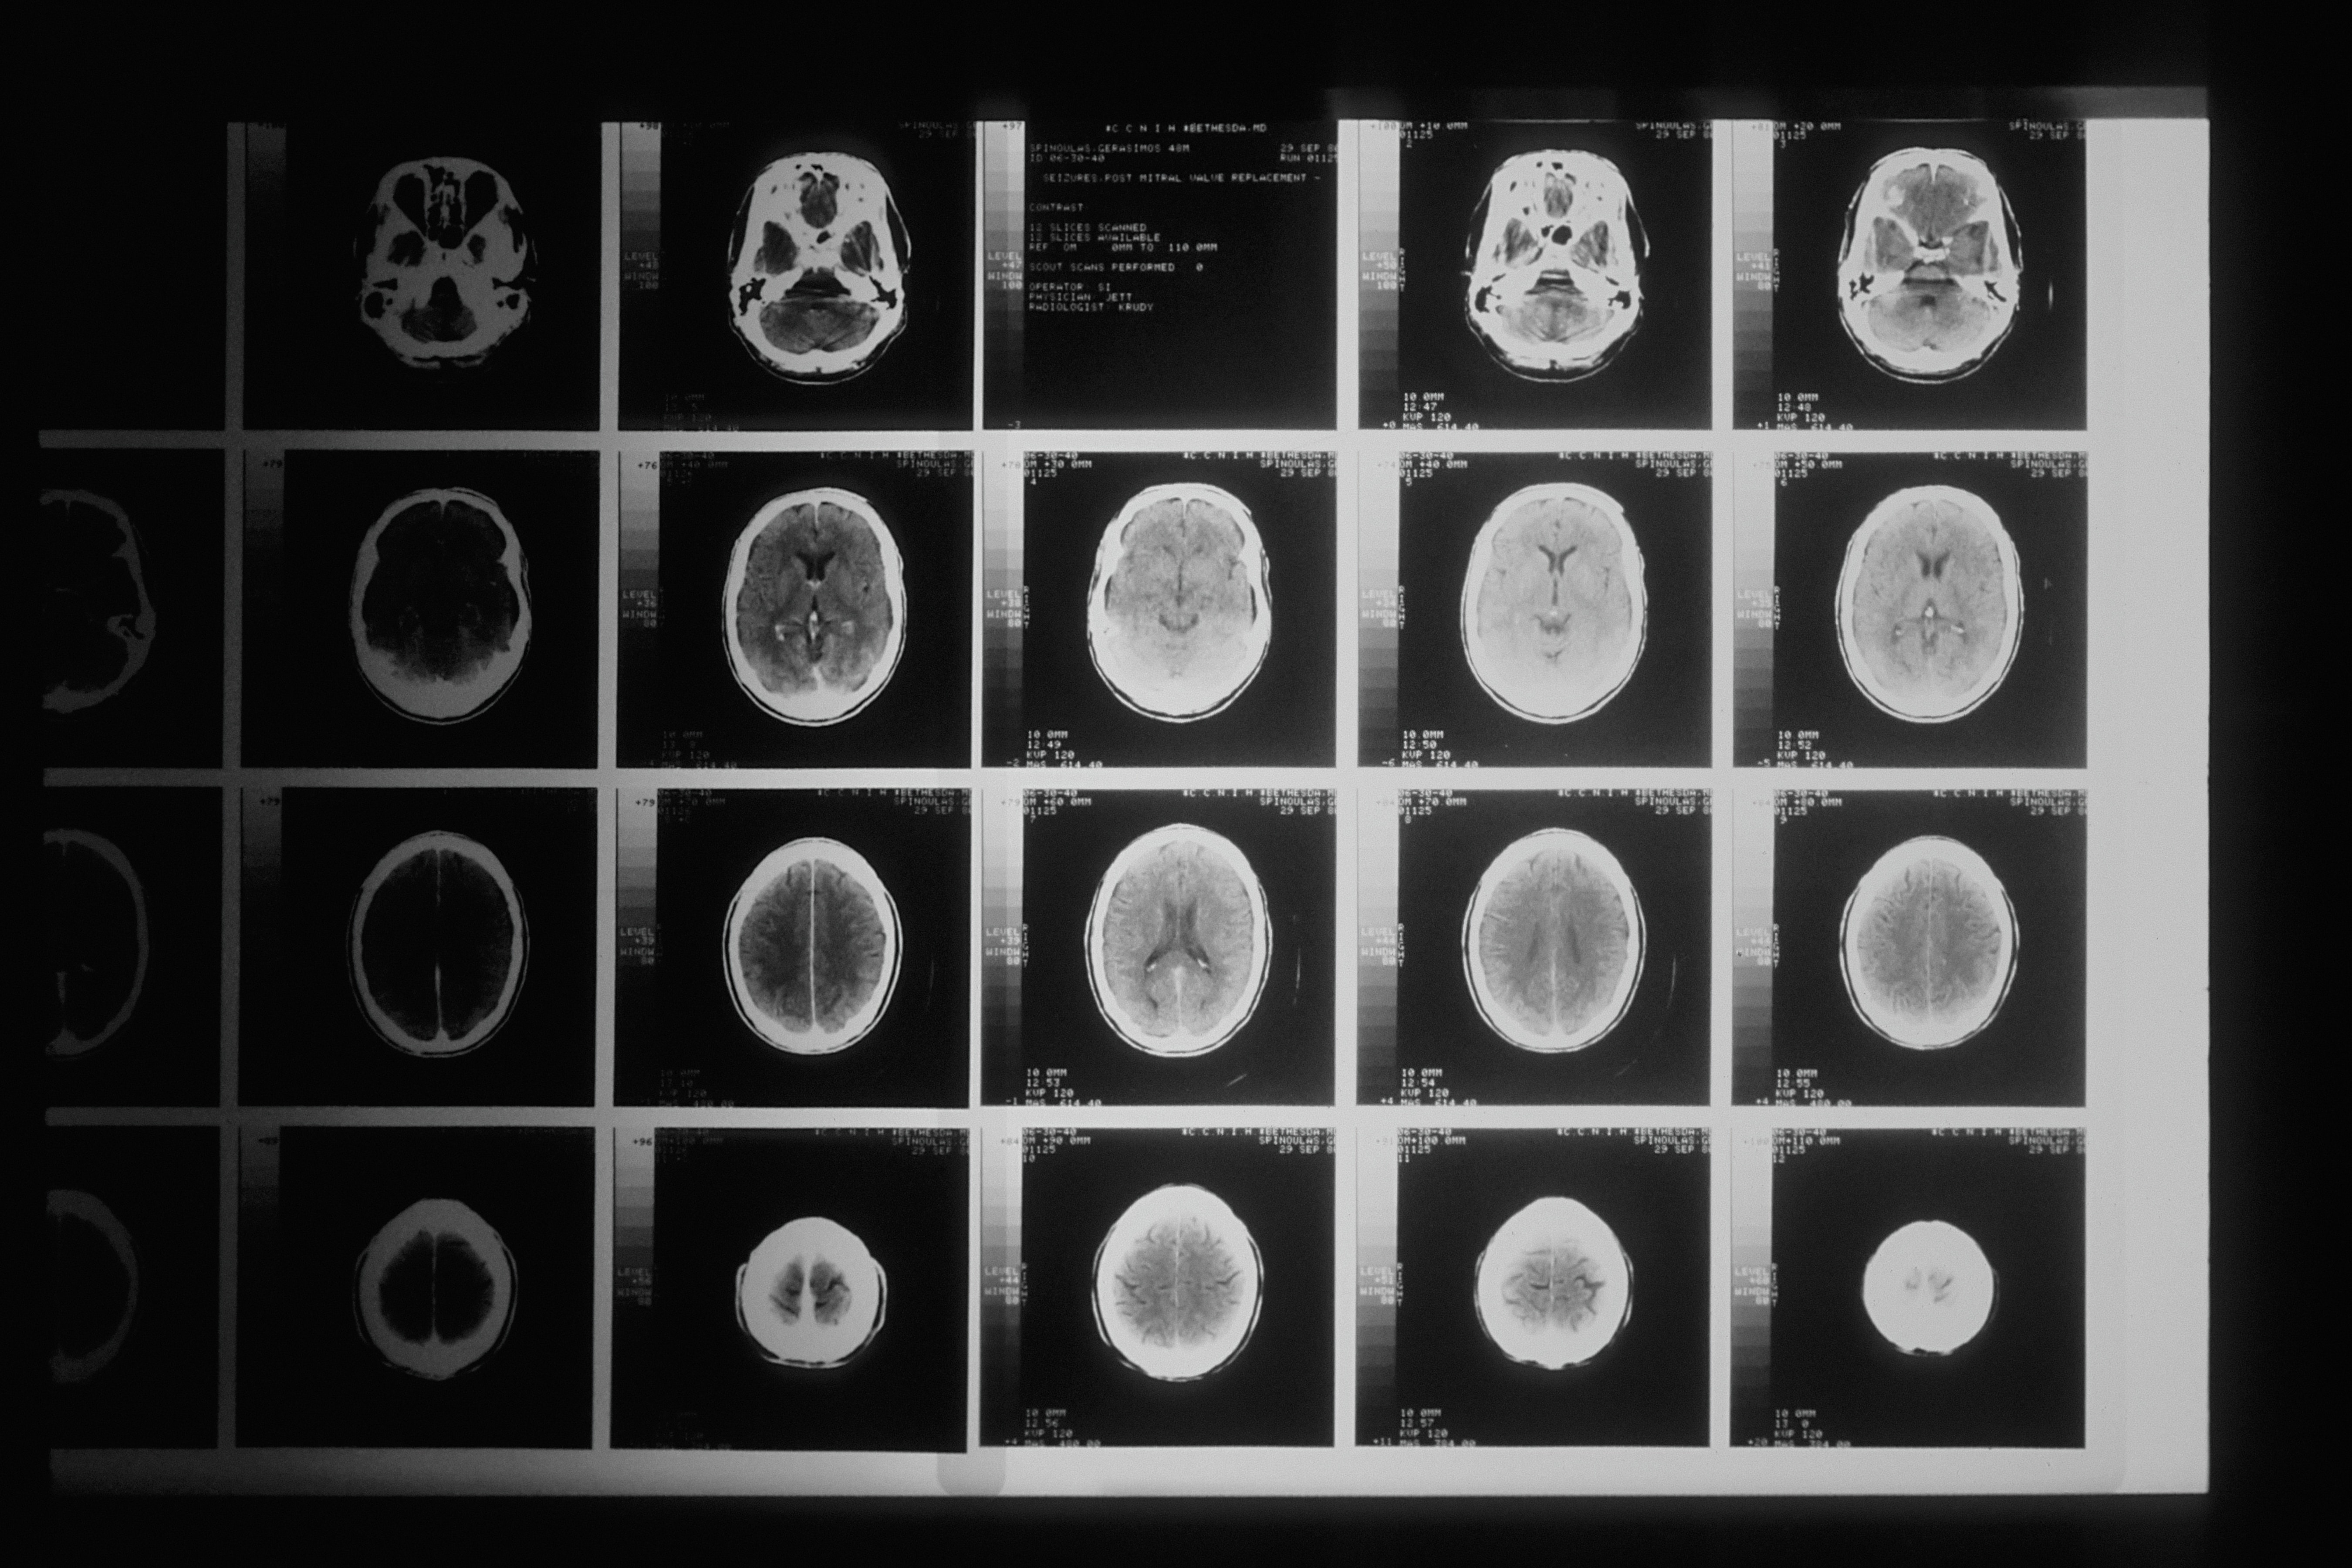

#### __Disclaimer:__
This Jupyter notebook and its contents are __intended solely for educational purposes__. The included business case and the results of the deep learning models should not be interpreted as medical advice, and have not received endorsement or approval from any professional or medical organization.

The models and outcomes presented here are for illustrative purposes __only__. Users should __not__ use these models or their outcomes for making real-world decisions without consulting appropriate domain experts and medical professionals. Any actions taken based on the information in this notebook are at the user's own risk.
The author and contributors of this notebook disclaim any liability for the accuracy, completeness, or efficacy of the information provided.

## Business Understanding

---


* __Stakeholder:__ Zephyr Health Services

* __Business Case:__ As a junior data scientist at Zephyr Health Services, I am part of the team dedicated to harnessing the power of machine learning techniques. Our primary goal is to develop a cutting-edge Convolutional Neural Network (CNN) tailored for the precise identification of brain tumors in MRI images. By doing so, we aim to significantly enhance diagnostic accuracy, ultimately leading to improved patient care and outcomes. This initiative embodies our commitment to pushing the boundaries of medical diagnostics




## Data Understanding


---



## __Metrics__
We will prioritize recall in this project over accuracy. We will also aim for balance between recall (sensitivity) while maintaining a high level of precision (specificity). With these objectives in mind, we aim to reduce the number of false positives and increase the model's ability to correctly identify patients with pneumonia. In this context, false positives could lead to unnecessary treatment or interventions.


* __True Positives (TP)__: The model correctly predicted one of the positive classes (glioma_tumor, pituitary_tumor, or meningioma_tumor).

* __True Negatives (TN):__ This metric is not applicable in multi-class classification, as it is specific to binary classification where there are only two classes.

* __False Positives (FP):__ The model predicted one of the positive classes, but it was incorrect.

* __False Negatives (FN):__ The model failed to predict one of the positive classes.

<br>
\begin{gathered}   
Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive}
\end{gathered}
<br>

</br>

</br>
\begin{gathered}
Recall = \frac{True\ Positive}{False\ Negative + True\ Positive}
\end{gathered}
<br>

A high precision indicates that when our model predicts the presence of a tumor, the patient will likely have a tumor.
<br>

## Data Preparation


---





## Modeling


---




## Evaluation


---





## Deployment

---




